<p style="text-align: right;"> &#9989; Put your name here</p>  

# CMSE 491 - 002 - Final Exam
This is an open internet exam.  Feel free to use anything on the internet with one important exception...

- **Do not** communicate live with other people during the exam (either verbally or on-line).  The goal here is for you to find answers to these questions and not someone else.  

Please use paper provided at the front of the room to show your work.  Add your name to the upper right corner of **each page** and put the problem number on the upper left. 

You will be given **70 minutes** to complete this test.  Use your time wisely. 

**HINTS:**
- Neatness is important.  I will ignore all notes or code I can not read.
- Read the entire exam from beginning to end before starting.  Not all questions are equal in points vs. time so plan your time accordingly.   
- Skip questions you can not answer. 
- **Some of the information provided may be a distraction. Do not assume you need to understand everything written to answer the questions.**
- When we say "in your own words" it is still okay to Google the answer as a reminder, however, we would like you to do more than cut and paste.  Make the answer your own. 
- If you get stuck, try not to leave an answer blank. It is better to include some notes or stub functions so we have an idea about your thinking process so we can give you partial credit.   
- When you are done, restart the entire notebook and run from beginning to end and make sure your answers still match what you expect.  This will ensure you didn't do anything out of order by mistake. 
- **Answers to questions do not always result in nice round numbers. Do not assume that a fractional solution is incorrect.** 

### Exam Summary
1. (25 points) Underdetermined systems 
2. (25 points) Basis Transformations
3. (25 points) Overdetermined systems
4. (25 points) Using SVD for dimensionality reduction

In [2]:
# Here are some libraries you may need to use

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import math
sp.init_printing()

----
# Question 1 - (25 points) Underdetermined systems 

Suppose that we have three objects, we know that one has a mass of 2 kg, and we want to find the two unknown masses. Experimentation with a (assume weightless) meter stick produces these two balances. (diagram not to scale)

<img src="https://goo.gl/h2cqwE" width="50%">


For the masses to balance we must have the sum of the moments on the left equal to the sum of the moments on the right, where the moment of an object is its mass times its distance from the balance point.   That gives a system of two linear equations:

$$ 40A + 15B = 100$$
$$25B = 50 + 50A$$

<font color=red>**Question 1.a:**</font> Solve the above system of linear equations and report the mass for objects A and B.

In [3]:
##put your answer here

<font color=red>**Question 1.b:**</font> Now lets consider a system where we have three unknown masses instead of two. Experimentation with a meter stick produces the two balanced states shown below (diagram not to scale). Write the system of linear equations for this system.

<img src="https://goo.gl/Rkn178" width="50%">


<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

<font color=red>**Question 1.c:**</font> What is the reduced row echelon form for of the an augmented matrix representing the system from question 1.b?

In [10]:
##put your answer here

<font color=red>**Question 1.d:**</font> Write out the solutions to above problem in terms of a reduced set of variables. i.e. What are the possible weights for A, B, and C?

In [16]:
##put code you may have to calculate your answer here

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

<font color=red>**Question 1.e**:</font>  Estimate the minimum amount of mass for object C that keeps this system balanced (Hint you can't have zero or negative mass)? Also report masses A and B at this balance point and explain how you got your answer.

In [ ]:
##Put your answer here

----
# Question 2 - (25 points) Basis Transformations

> Changing basis allows you to convert a matrix from a complicated form to a simple form. It is often possible to represent a matrix in a basis where the only nonzero elements are on the diagonal, which is exceptionally simple. These diagonal elements will be the eigenvalues of the matrix. This is especially helpful in solving linear systems of differential equations. Often in physics, engineering, logistics, and probably lots of other places, you have a system of differential equations which all depend on each other. In order to solve the system directly, you would have to solve all equations at once, which is hard. We can use matrices to describe this system. By changing basis, you may be able to make that matrix diagonal, which effectively separates the differential equations from each other, so you can solve just one at a time. This is comparatively easy. Situations where I know this comes up are:
> 
> - Quantum mechanics, solving the Schrodinger equation to describe the state of matter on the quantum level.
> - Electrical engineering, understanding the time-evolution of an electrical circuit.
> - Mechanical engineering, understanding the motion of a linear mechanical system, such as multiple spring-mass system.
>
> Here is another very important reason for change of basis: suppose you have a matrix $A$, and you want to calculate $A^n$ for some large $n$. This takes a while, even for computers. But, if you can find a change of basis matrix $C$ so that $A=C^{−1}DC$ for a diagonal matrix $D$, then
> $$A^x=C^{−1}DCC^{−1}DCC^{−1}DP \dots C^{−1}DC$$
> 
> All of the terms $CC^{−1}$ are the identity, so we get
> $$A^x=C^{−1}D^xC$$
>
> Powers of diagonal matrices are really easy: just raise each diagonal element to the $x$th power. So this method allows us to find powers of matrices very easily. When would we ever want to take large powers of matrices? Whenever finding numerical solutions to differential equations, partial or ordinary. This comes up all the time, so we are glad that we can change bases!
<p style="text-align: right;">From: https://math.stackexchange.com/questions/1740032/is-basis-change-ever-useful-in-practical-linear-algebra </p>



Given that the computational complexity of multiplying two arbitrary $n \times n$ matrices is $O(n^3)$ ([ref](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra)) The computational complexity of taking the power of an arbitrary square matrix ($A^x$) is doing $O(n^3)$, $x$ times or:

$$O(xn^3)$$

Here is an algorithm for using $C^{−1}D^xC$ to calculate $A^x$.  Included next to each step is the a computational complexity (assuming a simple implementation) for that step:
1. Calculate C, D using eigenvector decomposition: $O(n^3)$
2. Multiply the diagonal of $D$ by a power to generate $D^x$: $O(n)$
3. Invert C: $O(n^2)$
4. Multiply $CDC^{-1}$: $O(2n^3) \approx O(n^3)$


<font color=red>** Question 2.a:**</font> Typically the computational complexity to  invert a matrix is $O(n^3)$ ([ref](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra)). Explain why the computational complexity listed in step 3 only requires $O(n^2)$ to invert the matrix? 

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

<font color=red>** Question 2.b:**</font> What is the overall computational complexity of using $C^{−1}D^xC$ to calculate $A^x$?  How does this complexity compare to the arbitrary $A$ case?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)


## Example
Now, lets try this out in an example.   Consider the $5 \times 5$ matrix $A$ randomly generated using the code below. and use this matrix to answer the questions in the remainder of this section:

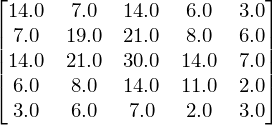

In [20]:
import random
import numpy as np

n = 5
random.seed(1)
ran = [[ random.random() for i in range(n)] for j in range(n)]
A = np.round(np.matrix(ran)*3)

#Trick to make matrix symmetric
A = A.T*A
sp.Matrix(A)

<font color=red>** Question 2.c:**</font> The matrix generated by the above code should be symmetric. Explain what linear algebra technique is used and why it should always be symmetric?  

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

<font color=red>** Question 2.d:**</font> Since the $A$ matrix is symmetric it is also diagonalizable.  Use the eigenvalues and eigenvectors of $A$ to calculate  $D$  and  $C$  such that  $A=CDC^{−1}$

In [21]:
# Put your answer here

<font color=red>** Question 2.e:**</font>  The following code takes the power of a diagonalized matrix $D$.  Demonstrate using the numpy **```allclose```** function that $CD^{10}C^{-1}$ is the same as $A^{10}$:

In [71]:
x = 10
D10 = np.zeros(D.shape)
for i in range(D.shape[0]):
    D10[i,i] = D[i,i]**x

# put your comparision here

----
# Question 3 - (25 points) Overdetermined systems

<img src="http://nineplanets.org/images/solar-system-439046_640.jpg" width="100%">
  
The following table lists the average distance from the sun to each of the first seven planets, using Earth's distance as a unit of measure. 

| Mercury | Venus | Earth | Mars | Jupiter | Satern | Uranus | 
|---------|-------|-------|------|---------|--------|--------|
| 0.39    | 0.72  | 1.00  | 1.52 | 5.20    | 9.54   | 19.2   |

The following is a plot of the data:

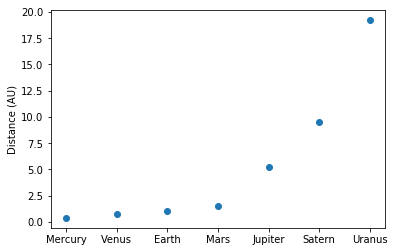

In [73]:
distances = np.matrix([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2])
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
ind = [1,2,3,4,5,6,7]

plt.scatter(ind, distances);
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

**Note** that the above plot does not look like a line, and so finding the line of best fit is not fruitful.  It does, however look like an exponential curve (maybe a polynomial?). The following step transforms the distances using the numpy **```log```** function and generates a plot that looks much more linear. 

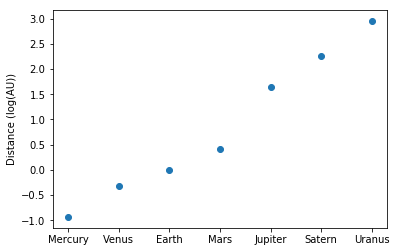

In [74]:
log_distances = np.log(distances)

plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')

For this question we are going to find the coefficients ($c$) for the best fit line of the form $c_1 + c_2i= \log{d}$, where $i$ is the index of the planet and $d$ is the distance.  

<font color=red>**Question 3.a:**</font> Construct this problem in the form $Ax=b$ and define the $A$ matrix and the $b$ matrix as numpy matrices.

In [77]:
#put your answer here
#A = np.matrix()
#b = np.matrix()

<font color=red>**Question 3.b:**</font> Solve for the best fit of $Ax=b$ and define a new variable $c$ which consists of the of the two coefficients used to define the line $(\log{d} = c_1 + c_2i)$

In [78]:
##Put your answer here:
c = [0,0]

<font color=red>**Question 3.c:**</font> Modify the following code (as needed) to plot your best estimates of $c_1$ and $c_2$ against the provided data.  

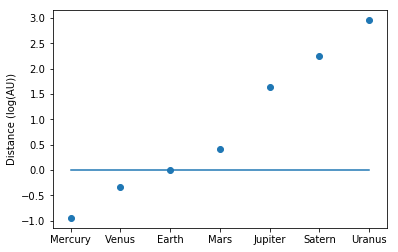

In [79]:
## Modify the following code

est_log_distances = (c[0] + c[1]*np.matrix(ind)).tolist()[0]
plt.plot(ind,est_log_distances)

plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')

We can determine the quality of this line fit by calculating the root mean squared error between the estimate and the actual data:

In [80]:
rmse = np.sqrt(((np.array(log_distances)  - np.array(est_log_distances)) ** 2).mean())
rmse

Finally, we can also make the plot on the original axis using the inverse of the log (i.e. the exp function):

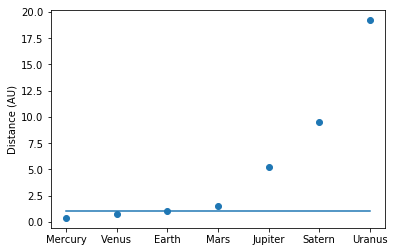

In [81]:
est_distances = np.exp(est_log_distances)
plt.scatter(ind,distances)
plt.plot(ind,est_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

<font color=red>**Question 3.d:**</font> The asteroid belt between Mars and Jupiter is what is left of a planet that broke apart.  Do the above calculation again but renumber so that Jupyter is 6, Saturn is 7 and Uranus is 8. The following code is provided to save you time cutting and pasting. 

In [82]:
distances = np.matrix([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2])
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
ind = [1,2,3,4,5,6,7]

log_distances = np.log(distances)

In [84]:
## Copy and Paste your code for finding c here

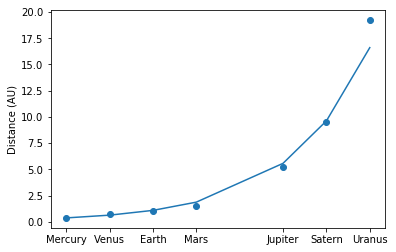

In [86]:
est_log_distances = (c[0] + c[1]*np.matrix(ind)).tolist()[0]

est_distances = np.exp(est_log_distances)
plt.scatter(ind,distances)
plt.plot(ind,est_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

rmse = np.sqrt(((np.array(log_distances)  - np.array(est_log_distances)) ** 2).mean())
rmse

<font color=red>**Question 3.e:**</font> This model of planet location was used to help discover Neptune and prompted people to look for the "missing planet" in position 5 which resulted in the discovery of the asteroid belt.  Based on the above model, what is the estimated  distance of the asteroid belt and Neptune from the sun in AUs? (**Hint:** you can check your answer by searching for the answer on-line).

In [87]:
#Put your prediction calcluation here

----
# Question 4 - (25 points) Using SVD for dimensionality reduction

<img src="http://res.cloudinary.com/miles-extranet-dev/image/upload/ar_16:9,c_fill,w_1000,g_face,q_50/Michigan/migration_photos/G21696/G21696-msubeaumonttower01.jpg" width="50%">

The following code reads an image file from a website, discards the green and blue channels and pulls out the 'red' component of the image in a numpy matrix called A. We will treat this numpy array as a grayscale image. 

In [89]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import math
sp.init_printing()

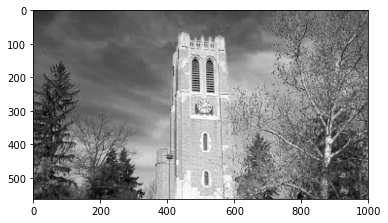

In [90]:
from urllib.request import urlopen
from scipy.misc import imread, imsave

url = 'http://res.cloudinary.com/miles-extranet-dev/image/upload/ar_16:9,c_fill,w_1000,g_face,q_50/Michigan/migration_photos/G21696/G21696-msubeaumonttower01.jpg'

with urlopen(url) as file:
    im = imread(file, mode='RGB')
    
A = np.matrix(im[:,:,0])
plt.imshow(A, cmap='gray')

## Step 1: Singular Value Decomposition
The following code does a singular value decomposition (SVD) of the image matrix $A$. 

$$A = U\Sigma V^T$$

**Note:** This may take a while.......hopefully you should only need to do this once...

In [91]:
U, e, Vt = np.linalg.svd(A)

<font color=red>** Question 4.a:**</font> Remember that the numpy ```svd``` function returns $U$, a vector of singular values ($\sigma$) and the transpose of $V$.  Verify the success of the decomposition by regenerating $A$ from the calculated components and comparing the regenerated $A$ to the original image $A$ using the numpy ```allclose``` function.

In [92]:
#Put your answer here

<font color=red>** Question 4.b:**</font> We use the np.allclose function instead of a simple python equality (==) to account for small errors in calculation. Where do these errors come from?  

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

## Step 2: Removing small singular values.

We are now going to make a new image but only keep the $N$ biggest singular values while setting all of the rest to zero. First we define a new vector (```s```) consisting of the first $N=10$ singular values:

In [62]:
N = 10
s = e[0:N+1]

Now lets remake the $\Sigma$ matrix using $s$. We will call this new $\Sigma$ matrix ```S``` (capital ```S```). We will use ```S``` to generate a new image and show the rsults:

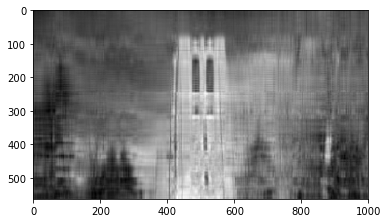

In [94]:
# Sigma matrix should be the same size as the original A matrix with mostly zero values
S = np.zeros(A.shape)

# The upper left diagonal of the Sigma matrix should be the singular values
S[:len(s), :len(s)] = np.diag(s)

#Compressed image
I = U*S*Vt

plt.imshow(I, cmap='gray')

We can plot the difference between the original image and the image generated with only 10 singular values. This represents the error in the image at each pixel.

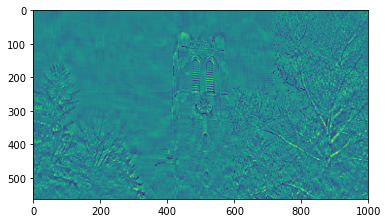

In [95]:
plt.imshow(A-I)

The following calculates the root mean squared error for the image

In [96]:
rmse = np.sqrt(((np.array(A)  - np.array(I)) ** 2).mean())
rmse

Although 10 values seems like a good number, you can really see some distortion in the second image.  We want to find a better number for $N$. The following code makes a plot of the singular values to get an idea of the scale. Note that this plot has a y-axis that is logarithmic. 

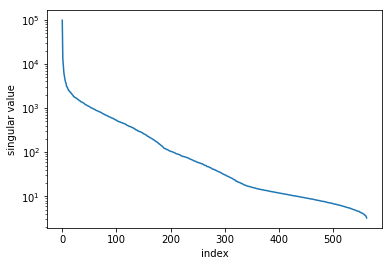

In [97]:
plt.plot(e)
plt.gca().set_yscale('log')
plt.xlabel('index')
plt.ylabel('singular value')


<font color=red>** Question 4.c:**</font> Next, Modify the code in **Step 2** to pick a different value for $N$ such that it is hard to tell the difference between the new image and the original image. Try to make this $N$ as small as possible. Describe The procedure you used to come up with a new value for $N$.  

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

## Step 3: Compression

The reason we set a bunch of singular values to zero is to save memory.  However, so far we haven't saved anything.  We can make an estimate of storage of the original image $A$ by multiplying the number of the rows by the number of columns (i.e this is how many numbers we need to store to recreate the image):

In [98]:
A.shape[0]*A.shape[1]

Our new SVD representation requires even more space to store the same information!

In [99]:
U.shape[0]*U.shape[1] + len(s) + Vt.shape[0] * Vt.shape[1]

However, the trick is that singular values of zero  don't add anything to the calculation and the zeros propagate  though the math.  We can now make a new set of matrices, ```U1```,  ```S1``` and ```V1``` which are much smaller than ```U```, ```e```, ```Vt``` because we can remove the rows and columns that turn out to be zero in the math. 

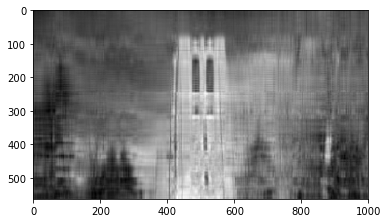

In [100]:
U1 = np.matrix(U[:,:len(s)])
S1 = np.diag(s)
Vt1 = np.matrix(Vt[:len(s),:])

#Compressed image
I = U1*S1*Vt1

plt.imshow(I, cmap='gray')

<font color=red>** Question 4.d:**</font> How much space is required to store ```U1```, ```s```, and ```Vt1```? 

In [101]:
## Put your answer here

<font color=red>** Question 4.e:**</font> If everything from above is correct, then we demonstrated that converting an image to a reduced SVD format will save in memory storage. Describe at least two disadvantages of using SVD for image compression.

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---------
### Congratulations, you're done with your entire semester!!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell and restart and check the notebook for errors).

&#169; Copyright 2017,  Michigan State University Board of Trustees